In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold = np.inf)
import seaborn as sb
import scipy.stats as st
from sklearn.preprocessing import Imputer

**First of all we read the data from the csv file.**

**We performed some peliminary investigations in order to get an intuition about how the data behaves.**

In [2]:
ds = pd.read_csv("googleplaystore.csv")

In [3]:
ds.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
ds.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 1.Cleaning The Data:

### 1.1 Standardizing and fixing the values of the columns:

**By Checking the data, we can see that there are inconsistencies with the some of the columns:**

**The first column we tackled is the Reviews columns which has one row with a char value along with the string.
For this column, first we changed the value in the problem row to a string with the value of the integer,
then we changed the entire column to be of type *Integer*.
**



In [6]:
ds['Reviews'] = ds['Reviews'].apply(lambda x: x.replace('3.0M', '3000000'))
ds['Reviews'] = ds['Reviews'].apply(lambda x: int(x))

In [7]:
print(ds.Reviews.unique())

[     159      967    87510   215644      167      178    36815    13791
      121    13880     8788    44829     4326     1518       55     3632
       27   194216   224399      450      654     7699       61      118
      192    20260      203      136      223     1120      227     5035
     1015      353      564     8145    36639      158      591      117
      176   295221     2206       26   174531     1070       85      845
      367     1598      284    17057      129      542    10479      805
     1403     3971      534     7774    38846     2431     6090      295
      190    40211      356    52530   116986     1379   271920      736
     7021      197      737     3574      994   197136      142    15168
     2155      138     5414    21777      348      250    13372     7880
     3617     4806    65786    31433     5097     1754     2680     1288
    18900    49790     1150     1739    32090     2225     4369     8572
      964    42050      104    17934      601      

**The next step is changing the type of the Ratings column to be of type float instead of string.**

In [8]:
ds['Rating'] = ds['Rating'].astype(str).astype(float)

**After investigating the *Installs* Column, we concluded that it could be converted to an Integer column,
The steps of conversion are as follows:**

1.Checking the original values of the *Installs* column

2.Removing the row with the install value 'Free' from the dataset

3.Removing the chars '+' and ',' whenever they are present in a row

4.Converting the whole column to be of type Integer


In [9]:
ds.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [10]:
ds[ds['Installs'] == 'Free'].shape

(1, 13)

In [11]:
ds =ds[ds['Installs'] != 'Free']
ds['Installs'] = ds['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
ds['Installs'] = ds['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
ds['Installs'] = ds['Installs'].apply(lambda x: int(x))

In [12]:
ds.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

**The price was adjusted to remove the '$' sign from the rows and converting the column to be of type Float.**

In [13]:
ds['Price'] = ds['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
ds['Price'] = ds['Price'].apply(lambda x: float(x))

In [14]:
ds.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])




**The *Category* column was investigated to see if it needs modification.**

**Afterwards, the *Size* column was checked as well,
Some rows were found with a char 'M' appended to the size value to denote a Mega and others with 'k' to denote a kilo.**

**The steps to clean the *Size* column were as follows:**

1. Replace all size values with 'M' or ',' to only the numerical value of the size

2. Replace all size values with 'k' to the numerical value divided by 1000 to be represented in Megabytes

3. Convert the whole column to be of type Float.

**For the purposes of this analysis, all sizes are in terms of Megabytes.**


In [15]:
ds.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [16]:
ds.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
ds['Size'] = ds['Size'].replace('Varies with device', np.NaN)
ds['Size'] = ds['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ds['Size'] = ds['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
ds['Size'] = ds['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
ds['Size'] = ds['Size'].apply(lambda x: float(x))

In [18]:
ds.Size.unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [19]:
ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Next up, the *Android Ver* column was investigated, and some discrepancies were found,
The next part, removes those discrepancies.**

In [20]:
ds["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [21]:
#######################3
#ds['Android Ver'] = ds['Android Ver'].replace('Varies with device', "")
ds['Android Ver'] = ds['Android Ver'].apply(lambda x: str(x).replace(' and up', '') if 'and up' in str(x) else x)
ds['Android Ver'] = ds['Android Ver'].apply(lambda x: str(x).replace('W', '') if 'W' in str(x) else x)


ds["Android Ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '4.0.3 - 7.1.1', '2.0', '3.2', '7.1',
       '7.0 - 7.1.1', '8.0', '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1',
       nan, '5.0 - 6.0', '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

**The Genres column was investigated in addition to the Ratings.**

In [22]:
ds.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [23]:
ds.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

### 1.2 Removing the Null values in the data

**After we finished manipulating the columns, we took a look at the number of null values in the data, we found
them to be more that was acceptable, therefore the next step was imputing the missing values to have consistent and accuarate data.**

In [24]:
ds.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**Firstly, the missing values in the *Size* column was imputed with the mean of the values in the column.**

In [25]:

mean_imputer = Imputer(missing_values=np.nan, strategy='mean')
mean_imputer.fit(ds[["Size"]])
ds[["Size"]]=mean_imputer.transform(ds[["Size"]]).ravel()
ds.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**There was a single column in the *Type* column that had a type of NaN, since the *Type* cannot be imputed the row was removed from the data.**

In [26]:
ds.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [27]:
ds[ds["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,21.51653,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [28]:
ds['Type'] = ds['Type'].replace(np.NaN, 'Free')

In [29]:
ds.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**Afterwards, the two rows with the missing Android Version were dropped since the missing values couldnot be imputed.**

In [30]:
ds=ds[pd.notnull(ds["Android Ver"])]
ds= ds[pd.notnull(ds["Current Ver"])]
ds.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [31]:
ds["Android Ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '4.0.3 - 7.1.1', '2.0', '3.2', '7.1',
       '7.0 - 7.1.1', '8.0', '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1',
       '5.0 - 6.0', '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

**The *Ratings* column also had a high number of missing values. Therefore, the values were imputed with the mean of the Ratings.**

In [32]:

mean_imputer1 = Imputer(missing_values=np.nan, strategy='mean')
mean_imputer1.fit(ds[["Rating"]])
ds[["Rating"]]=mean_imputer1.transform(ds[["Rating"]]).ravel()
ds.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [33]:
ds.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8559,DM security - Dragon Mobile,TOOLS,3.900000,27,3.00000,1000,Free,0.00,Everyone,Tools,"April 26, 2017",1.1.1,4.1
9482,Fake Call From Wengie Prank,FAMILY,3.500000,352,3.80000,50000,Free,0.00,Everyone,Entertainment,"July 23, 2017",1.0,3.0
10744,FP Markets,FINANCE,4.191838,1,2.00000,100,Free,0.00,Everyone,Finance,"January 30, 2018",1.0.0.0,4.3
8184,Visage Lab – face retouch,PHOTOGRAPHY,3.500000,49523,21.51653,5000000,Free,0.00,Everyone,Photography,"October 5, 2016",Varies with device,Varies with device
3592,Baby Sleep: White noise lullabies for newborns,PARENTING,4.600000,62386,3.40000,1000000,Free,0.00,Everyone,Parenting,"June 12, 2018",2.7,4.0
5627,Five Nights at Freddy's 2,FAMILY,4.600000,73919,40.00000,500000,Paid,2.99,Teen,Strategy,"November 15, 2014",1.07,2.3
5030,AE Air Hockey,SPORTS,3.800000,926,7.60000,50000,Free,0.00,Everyone,Sports,"August 1, 2013",1.0.0,2.2
4318,Daily K-Talk,FAMILY,4.300000,264,60.00000,10000,Free,0.00,Everyone,Education,"July 31, 2018",v8[1.0.10],2.3
4360,Super Hero M Craft Run,GAME,3.700000,303,38.00000,100000,Free,0.00,Everyone,Arcade,"July 12, 2017",1.6,4.0.3
6417,BL 女性向け恋愛ゲーム◆ごくメン,FAMILY,4.200000,1901,8.20000,100000,Free,0.00,Mature 17+,Simulation,"July 7, 2016",1.3.0,2.3.3


### 1.3: Categorizing The Data as needed:

**After the null values were imputed, we saw fit to categorize some of the highly changing columns as to improve the quality of the visualizations later on.**

**First of all, the *Price* column was categorized as to include the ranges of prices rather than integer values**

In [34]:
price_group = pd.cut(ds.Price, [0.0, 50.0, 100.0,150.0,200.0,250.0,300.0,350.0,400.0], include_lowest=True , labels=["[0.0, 50.0]", "(50.0, 100.0]","(100.0, 150.0]", "(150.0, 200.0]","(200.0, 250.0]", "(250.0, 300.0]","(300.0, 350.0]",  "(350.0, 400.0]"])
ds["price_groups"] = price_group
del ds["Price"]
ds.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price_groups
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,"[0.0, 50.0]"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3,"[0.0, 50.0]"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,"[0.0, 50.0]"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2,"[0.0, 50.0]"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4,"[0.0, 50.0]"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,Everyone,Art & Design,"March 26, 2017",1.0,2.3,"[0.0, 50.0]"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3,"[0.0, 50.0]"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2,"[0.0, 50.0]"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0,"[0.0, 50.0]"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3,"[0.0, 50.0]"


**After investigating the *Genres* column, it was found to include a lot of repetitive data in addition to multiple values in the same row, after drilling more into the values of *Genre*, we concluded that not row has more than two genres, therefore, we split the row into two rows: *Genre1* and *Genre2*.**

In [35]:
ds["Genre1"],ds["Genre2"]=ds["Genres"].str.split(';',1).str
del ds["Genres"]
ds["Genre2"]=ds.Genre2.fillna("-")
ds["Genre2"].unique()
ds.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated,Current Ver,Android Ver,price_groups,Genre1,Genre2
4839,Mini DAYZ: Zombie Survival,GAME,4.1,94661,21.51653,1000000,Free,Teen,"June 8, 2018",1.4.0,4.4,"[0.0, 50.0]",Action,-
4629,"U - Webinars, Meetings & Messenger",COMMUNICATION,4.1,6601,31.00000,500000,Free,Everyone,"July 2, 2018",4.7.0,4.1,"[0.0, 50.0]",Communication,-
4010,Bridge-C - Get More Storage,TOOLS,2.0,24,35.00000,1000,Free,Everyone,"December 29, 2017",1.7,6.0,"[0.0, 50.0]",Tools,-
3277,DuraSpeed,TOOLS,3.8,5431,1.30000,10000000,Free,Everyone,"November 13, 2017",1.5.0,6.0,"[0.0, 50.0]",Tools,-
272,QuickBooks Accounting: Invoicing & Expenses,BUSINESS,4.3,23175,41.00000,1000000,Free,Everyone,"July 13, 2018",18.7,4.1,"[0.0, 50.0]",Business,-
5144,AH Alarm Panel,TOOLS,3.9,7,0.08100,100,Paid,Everyone,"May 12, 2011",1.2.0,1.5,"[0.0, 50.0]",Tools,-
684,Teenage Chat & Dating,DATING,3.4,5,14.00000,500,Free,Mature 17+,"July 9, 2018",1.2,4.1,"[0.0, 50.0]",Dating,-
10149,EZ Pass,TOOLS,2.5,15,0.22800,5000,Free,Everyone,"September 10, 2016",1.3,2.3,"[0.0, 50.0]",Tools,-
1971,Jewels Legend - Match 3 Puzzle,GAME,4.6,280098,50.00000,10000000,Free,Everyone,"July 20, 2018",2.11.2,4.0.3,"[0.0, 50.0]",Arcade,-
1084,Transfer,FINANCE,4.1,31804,9.80000,5000000,Free,Everyone,"July 27, 2018",3.1.6.12,4.0,"[0.0, 50.0]",Finance,-


## 2 Analysis And Visualizations:

**The following section discusses the questions that were asked during the Analysis process in addition to the resulting visualizations and their meanings.
All The questions revolve around the central theme of finding out which apps are performing the best according to different standards. The chosen questions reflect this theme.**

### 2.0 What are the min and max values of the *Size* in addition to the average number of installs?

The number of apps with minimum size: 7
The number of apps with the outlier maximum size: 16


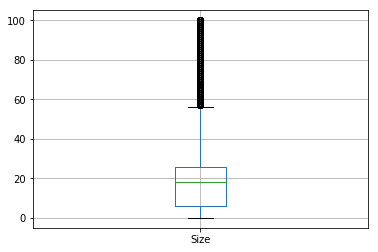

In [36]:
#box plot

boxPlot = ds.boxplot(column = 'Size')
boxPlot

printrow = ds[ds["Size"] == 1]
printfinal = len(printrow["App"])
print("The number of apps with minimum size: " + str(len(ds[ds["Size"] == 1])))
print("The number of apps with the outlier maximum size: " + str(len(ds[ds["Size"] == 100])))

### 2.1 What is the relation between the number of app installs and content rating?

**First of all we asked ourselves, how are the number of installs and the content rating are connected as this could indicate which apps are performing well versus others.**

    Content Rating      Installs
0  Adults only 18+  6.666667e+05
1         Everyone  1.311524e+07
2     Everyone 10+  3.196590e+07
3       Mature 17+  1.107112e+07
4             Teen  2.873870e+07
5          Unrated  2.525000e+04


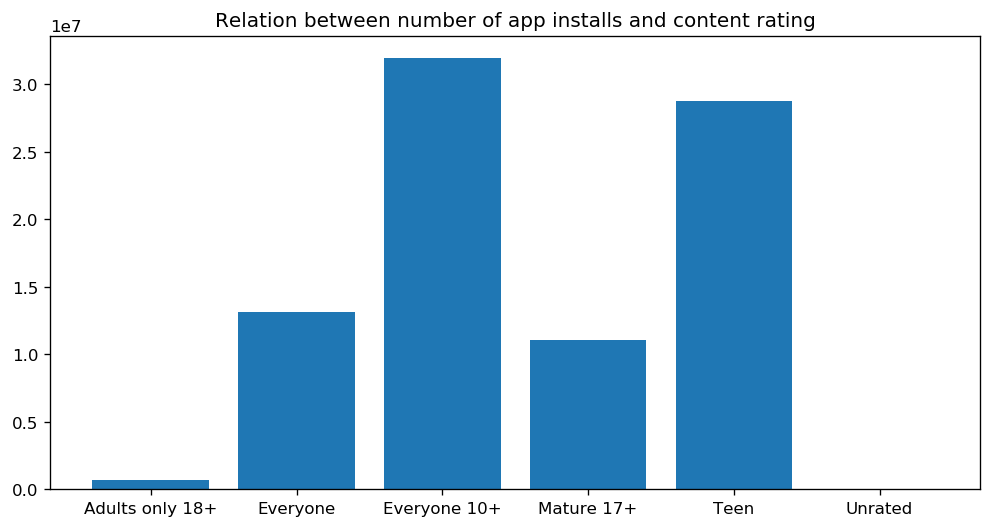

In [37]:
installsPatterns = ds.groupby(["Content Rating"], as_index=False).agg({'Installs': 'mean'})
print(installsPatterns)

fig, axes = plt.subplots(figsize=(10,5), dpi=120)
plt.bar(installsPatterns['Content Rating'], installsPatterns['Installs'], clip_on=False)
plt.title('Relation between number of app installs and content rating');

**Across all apps, the highest number of downloads was found in the *Everyone 10+* Content Rating.**

### 2.2 What is the relationship between the application ratings and category?

**After looking at the results from the first visualization, we wanted to dig deeper, so we investigated more into the ratings which indicates customer satisfaction in each Category in order to find out which Category of apps is performing the best.**

**To do this, first of all, the rows were grouped by *Category* and the *Ratings* for each category was aggregated by the mean.**

**After analysing the results, it is clear that the highest ratings are in the *Dating* category while the lowest ratings are found in the *Communications* category.**

               Category    Rating
0        ART_AND_DESIGN  4.368367
1     AUTO_AND_VEHICLES  4.190612
2                BEAUTY  4.260570
3   BOOKS_AND_REFERENCE  4.311198
4              BUSINESS  4.145475
5                COMICS  4.156395
6         COMMUNICATION  4.163613
7                DATING  4.007614
8             EDUCATION  4.387768
9         ENTERTAINMENT  4.126174
10               EVENTS  4.363202
11               FAMILY  4.192321
12              FINANCE  4.138932
13       FOOD_AND_DRINK  4.170497
14                 GAME  4.282444
15   HEALTH_AND_FITNESS  4.266102
16       HOUSE_AND_HOME  4.196614
17   LIBRARIES_AND_DEMO  4.182580
18            LIFESTYLE  4.112160
19  MAPS_AND_NAVIGATION  4.064919
20              MEDICAL  4.189801
21   NEWS_AND_MAGAZINES  4.142727
22            PARENTING  4.281973
23      PERSONALIZATION  4.306573
24          PHOTOGRAPHY  4.192099
25         PRODUCTIVITY  4.208029
26             SHOPPING  4.253925
27               SOCIAL  4.247817
28            

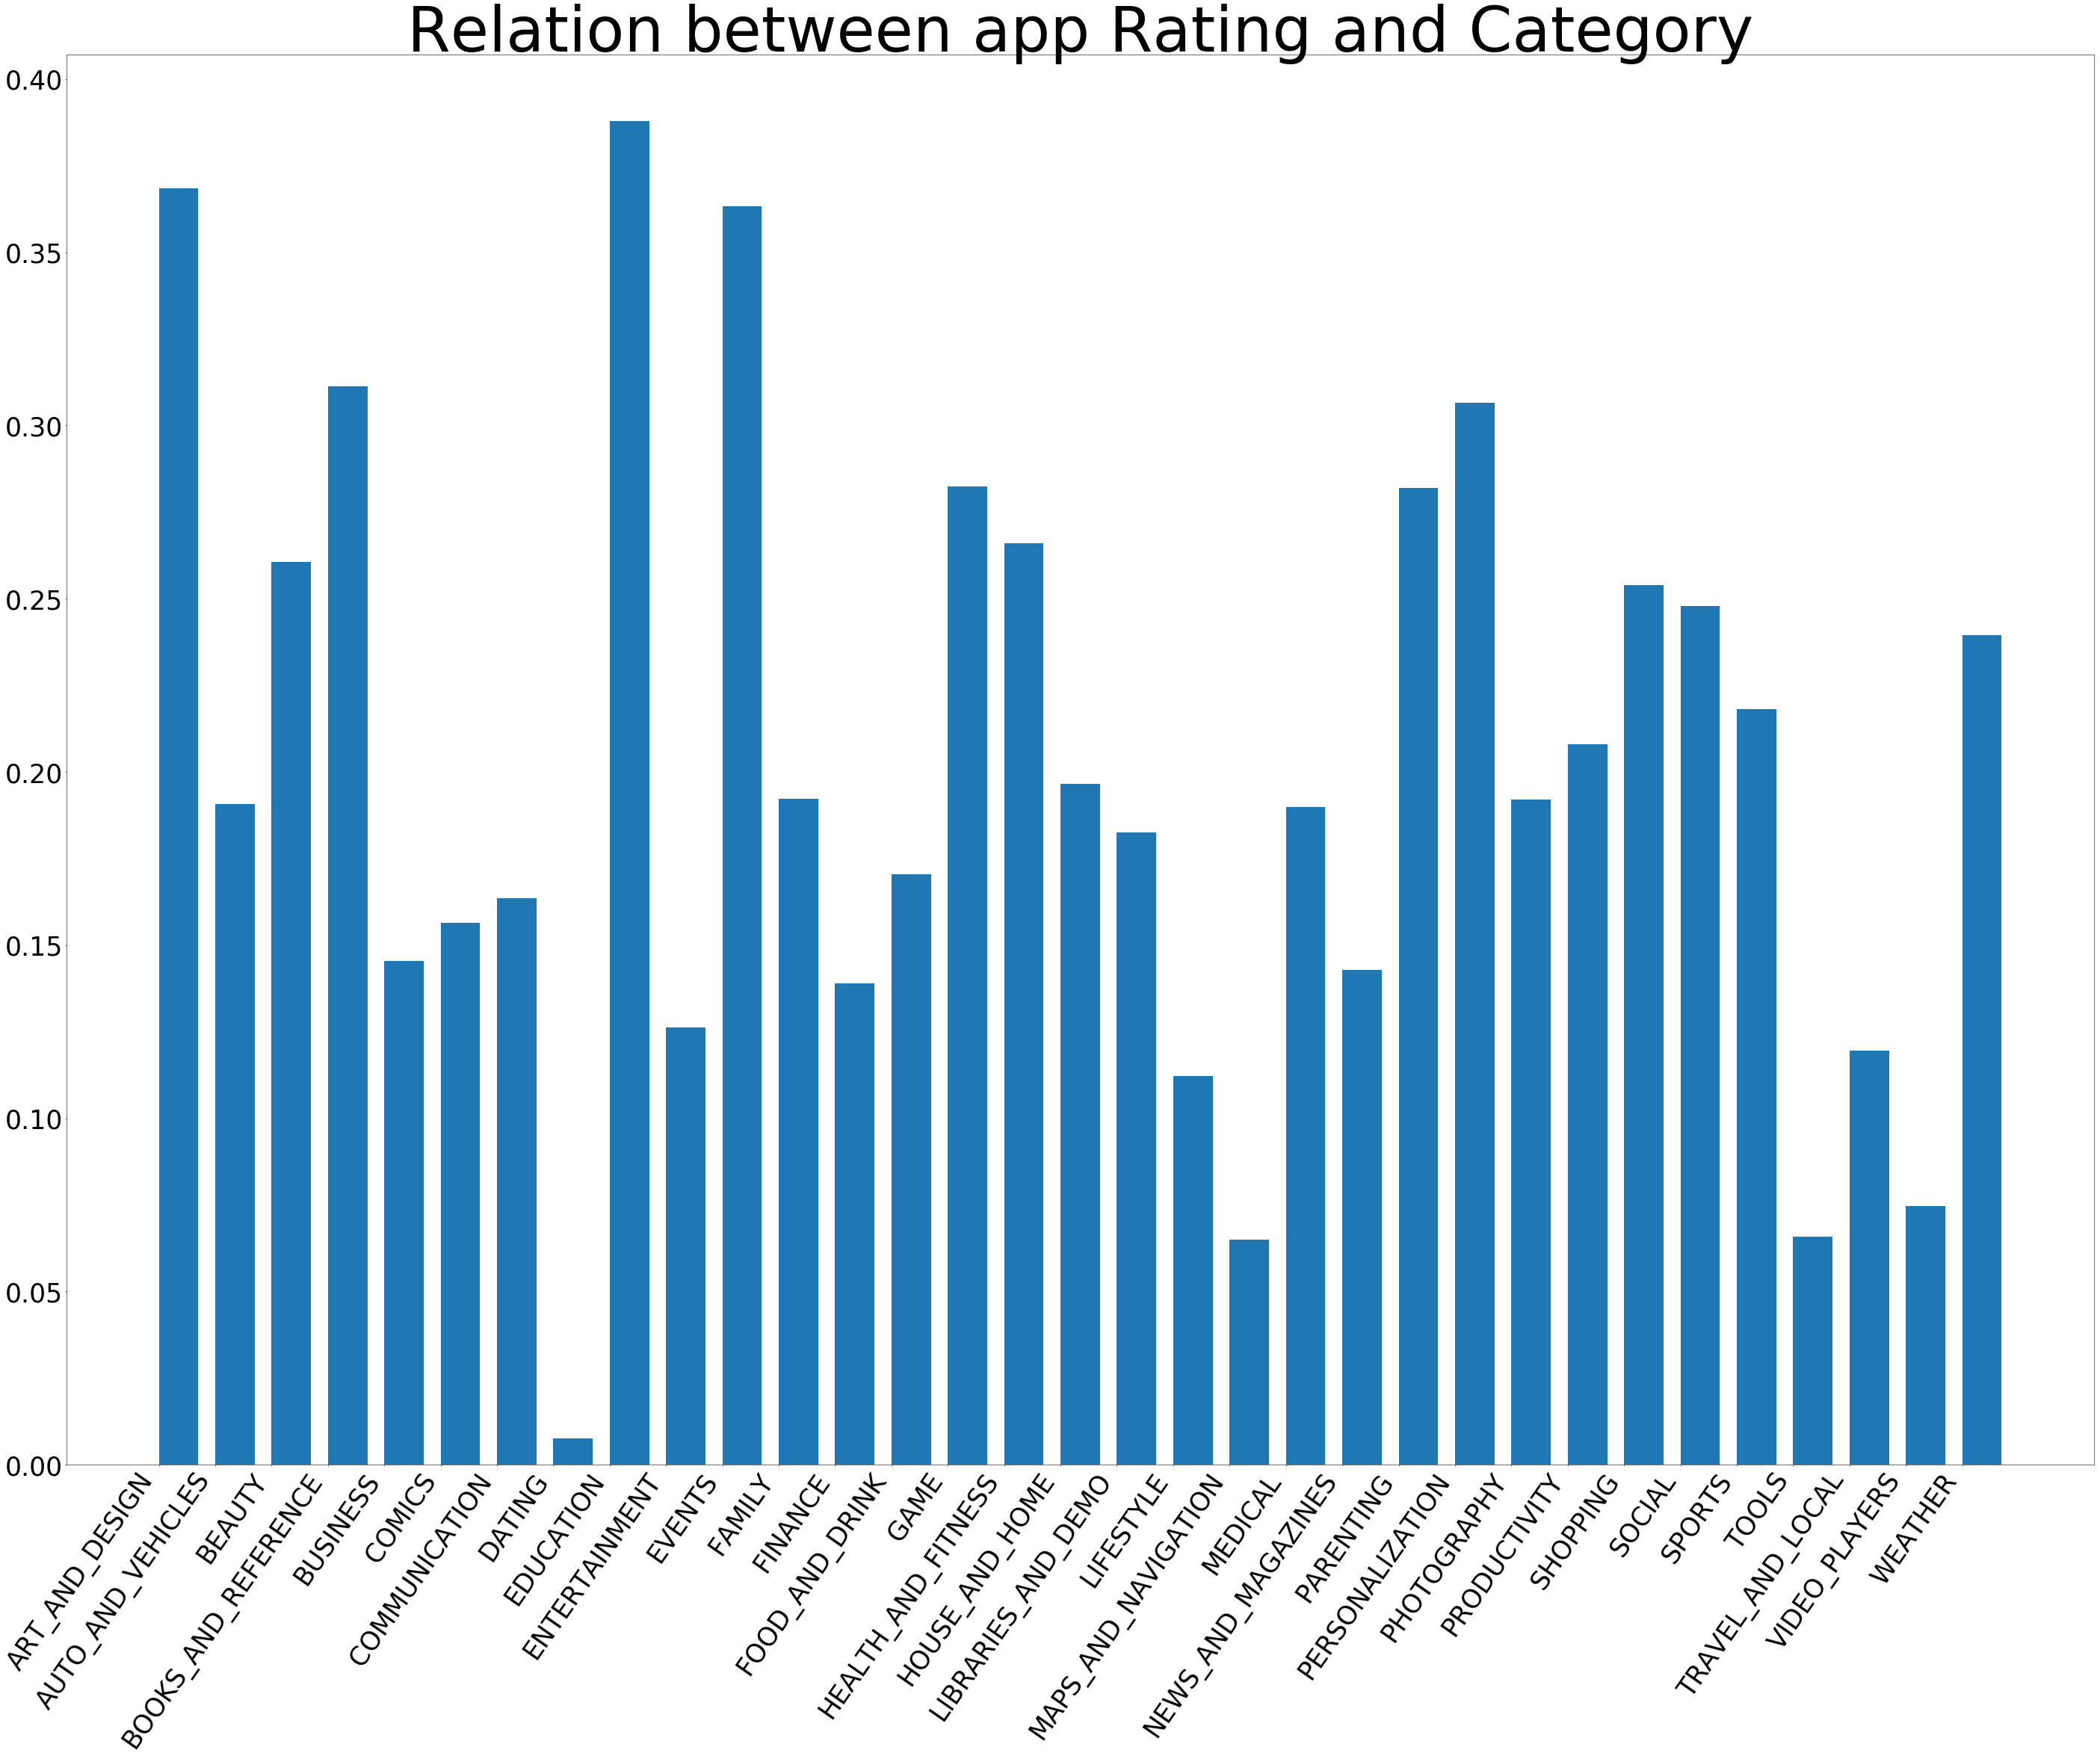

In [38]:
ratingPerCat = ds.groupby(["Category"], as_index=False).agg({'Rating': 'mean'})
print(ratingPerCat)

fig, axes = plt.subplots(figsize=(70,50), dpi=50)
plt.rcParams.update({'font.size':100})
plt.xticks(ha='right',rotation=55,fontsize=50)
plt.yticks(fontsize=50)
normedRatingPerCat = ratingPerCat['Rating']%4
plt.bar(ratingPerCat['Category'], normedRatingPerCat ,width=0.7, align='edge', )
plt.title('Relation between app Rating and Category');

### 2.3 What is the relationship between the *Category* and the *Reviews*?

**The next step was focusing our scope to the *Category* to explore it more, and check which category had the most reviews.**

**After analyzing the results, it is clear that the *Game* category has the most reviews.**

               Category     Reviews
0        ART_AND_DESIGN     1714385
1     AUTO_AND_VEHICLES     1163666
2                BEAUTY      396240
3   BOOKS_AND_REFERENCE    21959061
4              BUSINESS    13954552
5                COMICS     3383276
6         COMMUNICATION   815462260
7                DATING     7291278
8             EDUCATION    39595786
9         ENTERTAINMENT    59178154
10               EVENTS      161018
11               FAMILY   410226107
12              FINANCE    17550728
13       FOOD_AND_DRINK     8883330
14                 GAME  1585422349
15   HEALTH_AND_FITNESS    37893743
16       HOUSE_AND_HOME     3976385
17   LIBRARIES_AND_DEMO     1016973
18            LIFESTYLE    12882784
19  MAPS_AND_NAVIGATION    30659254
20              MEDICAL     1585975
21   NEWS_AND_MAGAZINES    54400863
22            PARENTING      958331
23      PERSONALIZATION    89345721
24          PHOTOGRAPHY   213516650
25         PRODUCTIVITY   114116975
26             SHOPPING   11

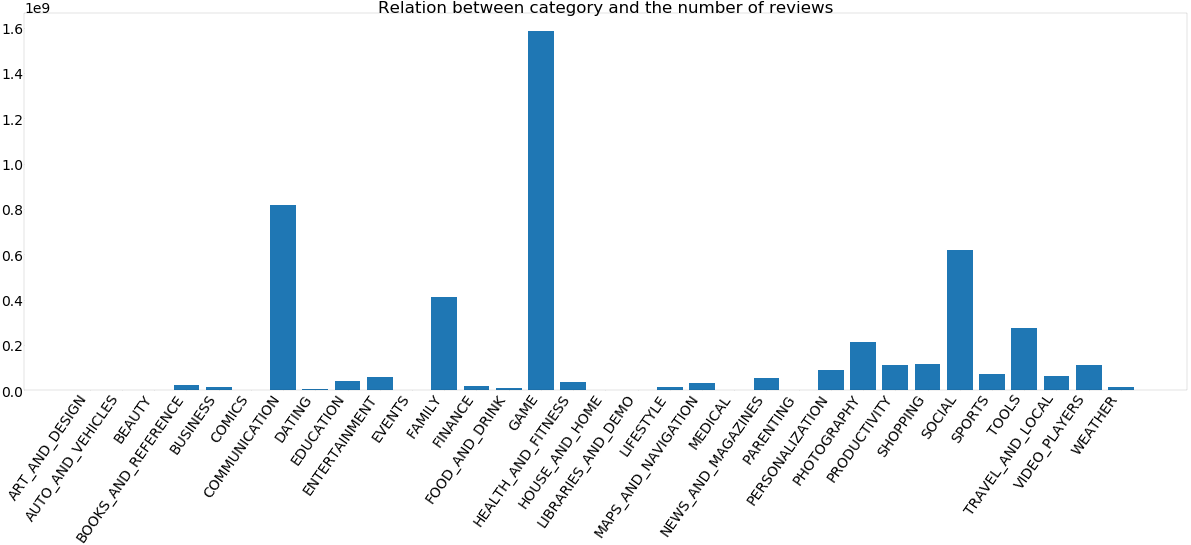

In [39]:
catVSreviews = ds.groupby(["Category"], as_index=False).agg({'Reviews': 'sum'})
print(catVSreviews)
fig, axes = plt.subplots(figsize=(150,50), dpi=10)
plt.xticks(ha='right',rotation=55,fontsize=100)
plt.yticks(fontsize=100)
plt.rcParams.update({'font.size':100})
plt.bar(catVSreviews['Category'], catVSreviews['Reviews'], clip_on=False)
plt.title('Relation between category and the number of reviews');

### 2.4 What is the relationship between the Type of apps (Free or Paid) with the number of Installs?

**We then shifted our attention to the Price aspect of applications, and unsurprisingly, since Free apps are more accessible and appealing to users, We found a significant gap between the number of installs of free apps and paid apps.**

   Type      Installs
0  Free  1.670078e+07
1  Paid  9.147437e+04


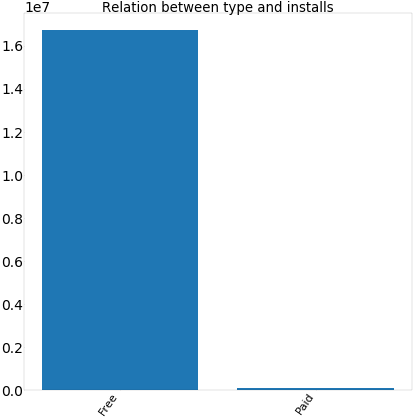

In [40]:
installsVsType = ds.groupby(["Type"], as_index=False).agg({'Installs': 'mean'})
print(installsVsType)
fig, axes = plt.subplots(figsize=(50,50), dpi=10)
plt.xticks(ha='right',rotation=55,fontsize=80)
plt.rcParams.update({'font.size':80})
plt.bar(installsVsType['Type'], installsVsType['Installs'], clip_on=False)

plt.title('Relation between type and installs');

### 2.5 What is the relationship between the number of installs and the ratings?

**To answer this question, first of all we had to quantize the ratings into categories specified by the quartile cuts. This was to smoothen the process of creating a visualization and making it easier to understand. After performing this step, a line chart was created to represent the change installs with each category.**

In [41]:
rating_qcut= pd.qcut(ds.Rating, 4)

ds["Ratings"] = rating_qcut


ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated,Current Ver,Android Ver,price_groups,Genre1,Genre2,Ratings
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,Everyone,"January 7, 2018",1.0.0,4.0.3,"[0.0, 50.0]",Art & Design,-,"(0.999, 4.1]"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,Everyone,"January 15, 2018",2.0.0,4.0.3,"[0.0, 50.0]",Art & Design,Pretend Play,"(0.999, 4.1]"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,Everyone,"August 1, 2018",1.2.4,4.0.3,"[0.0, 50.0]",Art & Design,-,"(4.5, 5.0]"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,Teen,"June 8, 2018",Varies with device,4.2,"[0.0, 50.0]",Art & Design,-,"(4.2, 4.5]"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,Everyone,"June 20, 2018",1.1,4.4,"[0.0, 50.0]",Art & Design,Creativity,"(4.2, 4.5]"


      Rating      Installs
0   1.000000  3.231250e+02
1   1.200000  1.000000e+03
2   1.400000  2.333333e+03
3   1.500000  3.683333e+02
4   1.600000  3.800000e+04
5   1.700000  1.021250e+04
6   1.800000  6.493750e+04
7   1.900000  2.992308e+04
8   2.000000  4.200125e+05
9   2.100000  2.275000e+04
10  2.200000  1.521857e+05
11  2.300000  1.320500e+04
12  2.400000  6.758421e+04
13  2.500000  1.227667e+05
14  2.600000  2.170400e+04
15  2.700000  1.543920e+05
16  2.800000  8.355119e+04
17  2.900000  1.598022e+05
18  3.000000  4.148660e+05
19  3.100000  1.544326e+06
20  3.200000  4.550698e+05
21  3.300000  9.309000e+05
22  3.400000  8.548043e+05
23  3.500000  1.461534e+06
24  3.600000  1.424815e+06
25  3.700000  7.205232e+06
26  3.800000  2.093969e+06
27  3.900000  1.584731e+07
28  4.000000  1.880157e+07
29  4.100000  1.202858e+07
30  4.191838  4.057441e+03
31  4.200000  1.805436e+07
32  4.300000  3.505054e+07
33  4.400000  3.025248e+07
34  4.500000  3.253809e+07
35  4.600000  1.515379e+07
3

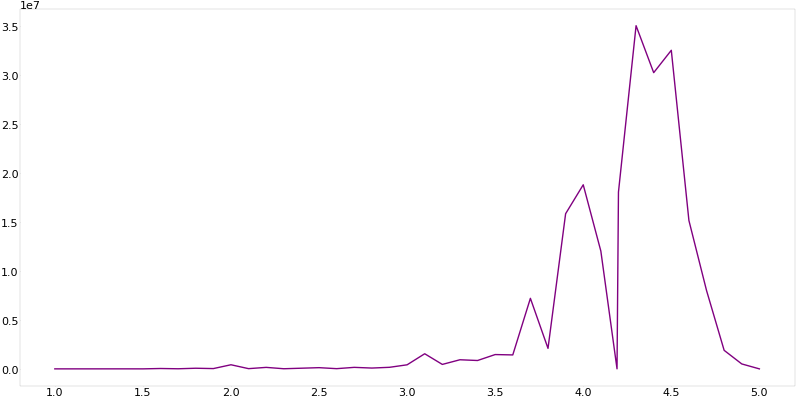

In [42]:
RatingVsInstalls = ds.groupby(["Rating"], as_index=False).agg({'Installs': 'mean'})
print(RatingVsInstalls)
fig, axes = plt.subplots(figsize=(100,50), dpi=10)
#axes.plot()
plt.plot(RatingVsInstalls["Rating"],RatingVsInstalls["Installs"],color='purple', linewidth=10)

### 2.6 What is the relationship between the *Category* and the *Installs*?

**After looking at the results, it is clear that the *Game* category has the most installs. It is also worth noting that although the *Communications* category has the lowest ratings as per chart 2.2, it has one of the highest number of installs.**

               Category     Installs
0        ART_AND_DESIGN    124333100
1     AUTO_AND_VEHICLES     53130211
2                BEAUTY     27197050
3   BOOKS_AND_REFERENCE   1921468576
4              BUSINESS   1001914865
5                COMICS     56086150
6         COMMUNICATION  32647276251
7                DATING    264310807
8             EDUCATION    871452000
9         ENTERTAINMENT   2869160000
10               EVENTS     15973161
11               FAMILY  10258203405
12              FINANCE    876648734
13       FOOD_AND_DRINK    273898751
14                 GAME  35086024415
15   HEALTH_AND_FITNESS   1583072512
16       HOUSE_AND_HOME    168712461
17   LIBRARIES_AND_DEMO     61995910
18            LIFESTYLE    537643539
19  MAPS_AND_NAVIGATION    724281890
20              MEDICAL     53257437
21   NEWS_AND_MAGAZINES   7496317760
22            PARENTING     31521110
23      PERSONALIZATION   2325483782
24          PHOTOGRAPHY  10088247655
25         PRODUCTIVITY  14176091369
2

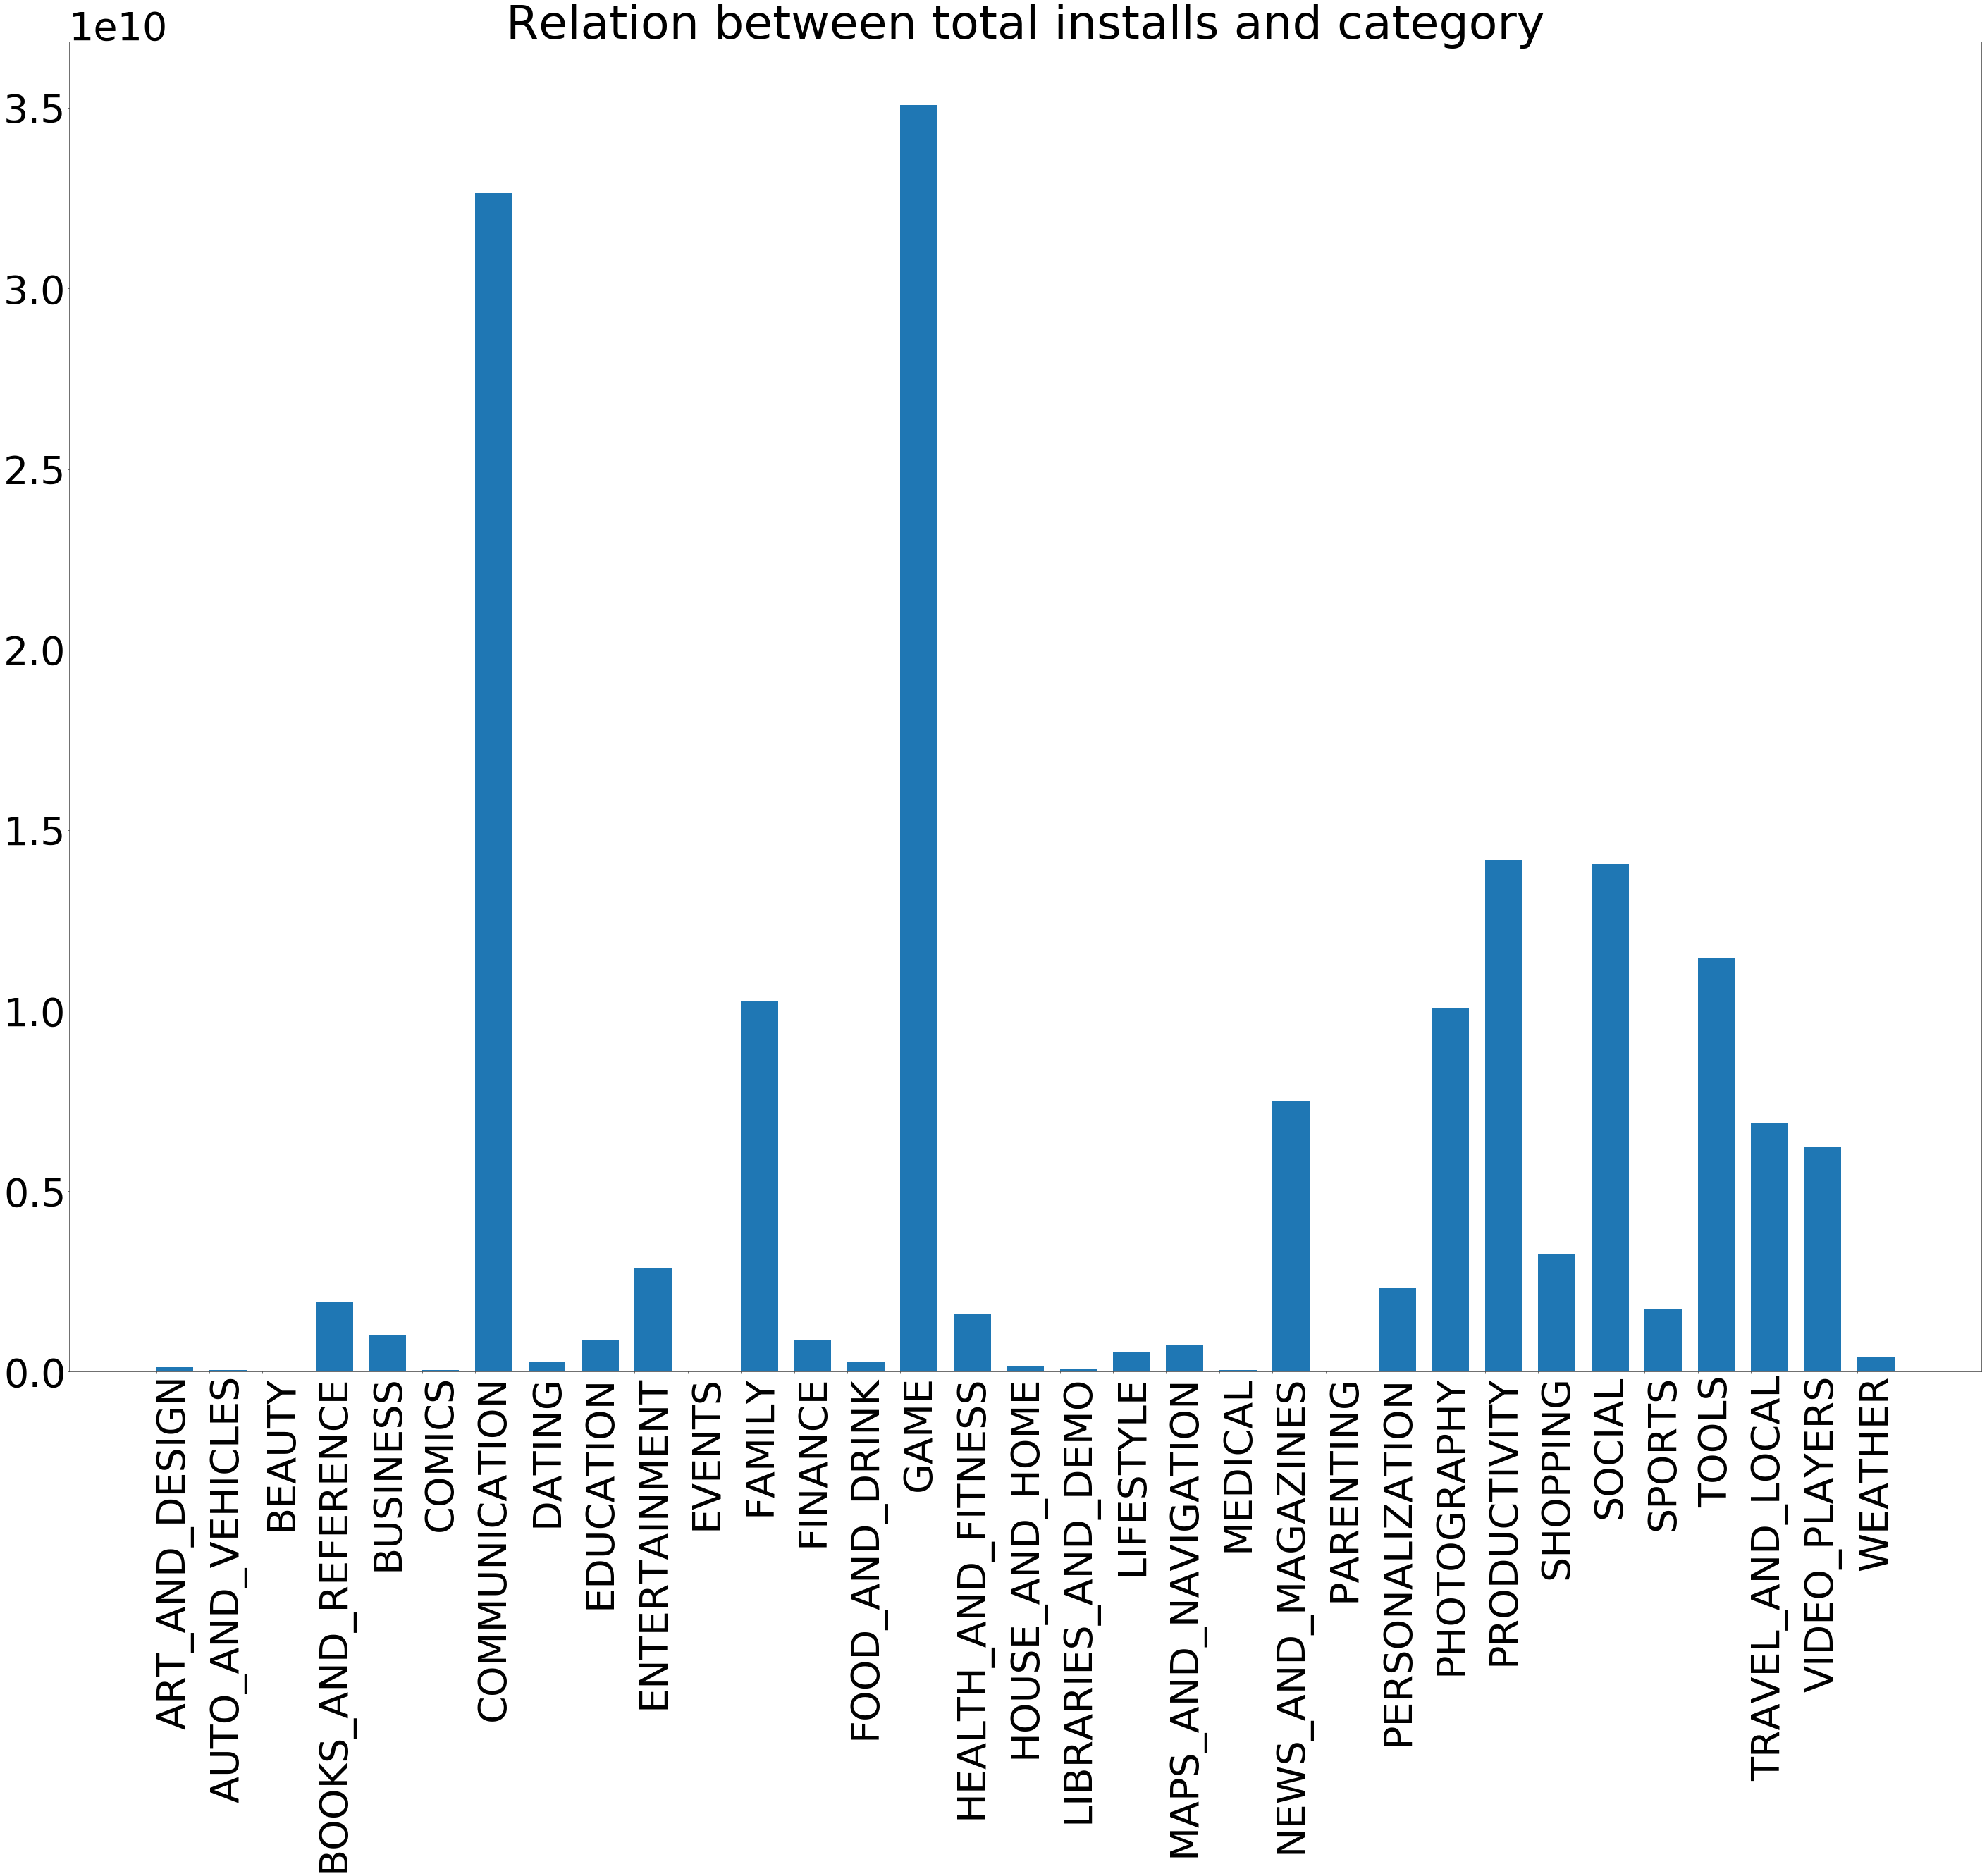

In [43]:
installsPerCat = ds.groupby(["Category"], as_index=False).agg({'Installs': 'sum'})
print(installsPerCat)

fig, axes = plt.subplots(figsize=(70,50), dpi=50)
plt.xticks(ha='left',rotation=90,fontsize=80)
plt.rcParams.update({'font.size':80})
normedInstallsPerCat = installsPerCat['Installs']
plt.bar(installsPerCat['Category'], normedInstallsPerCat ,width=0.7, align='edge', )
plt.title('Relation between total installs and category');

### 2.7 What is the relationship between the number of installs and the Genre (Genre1)?

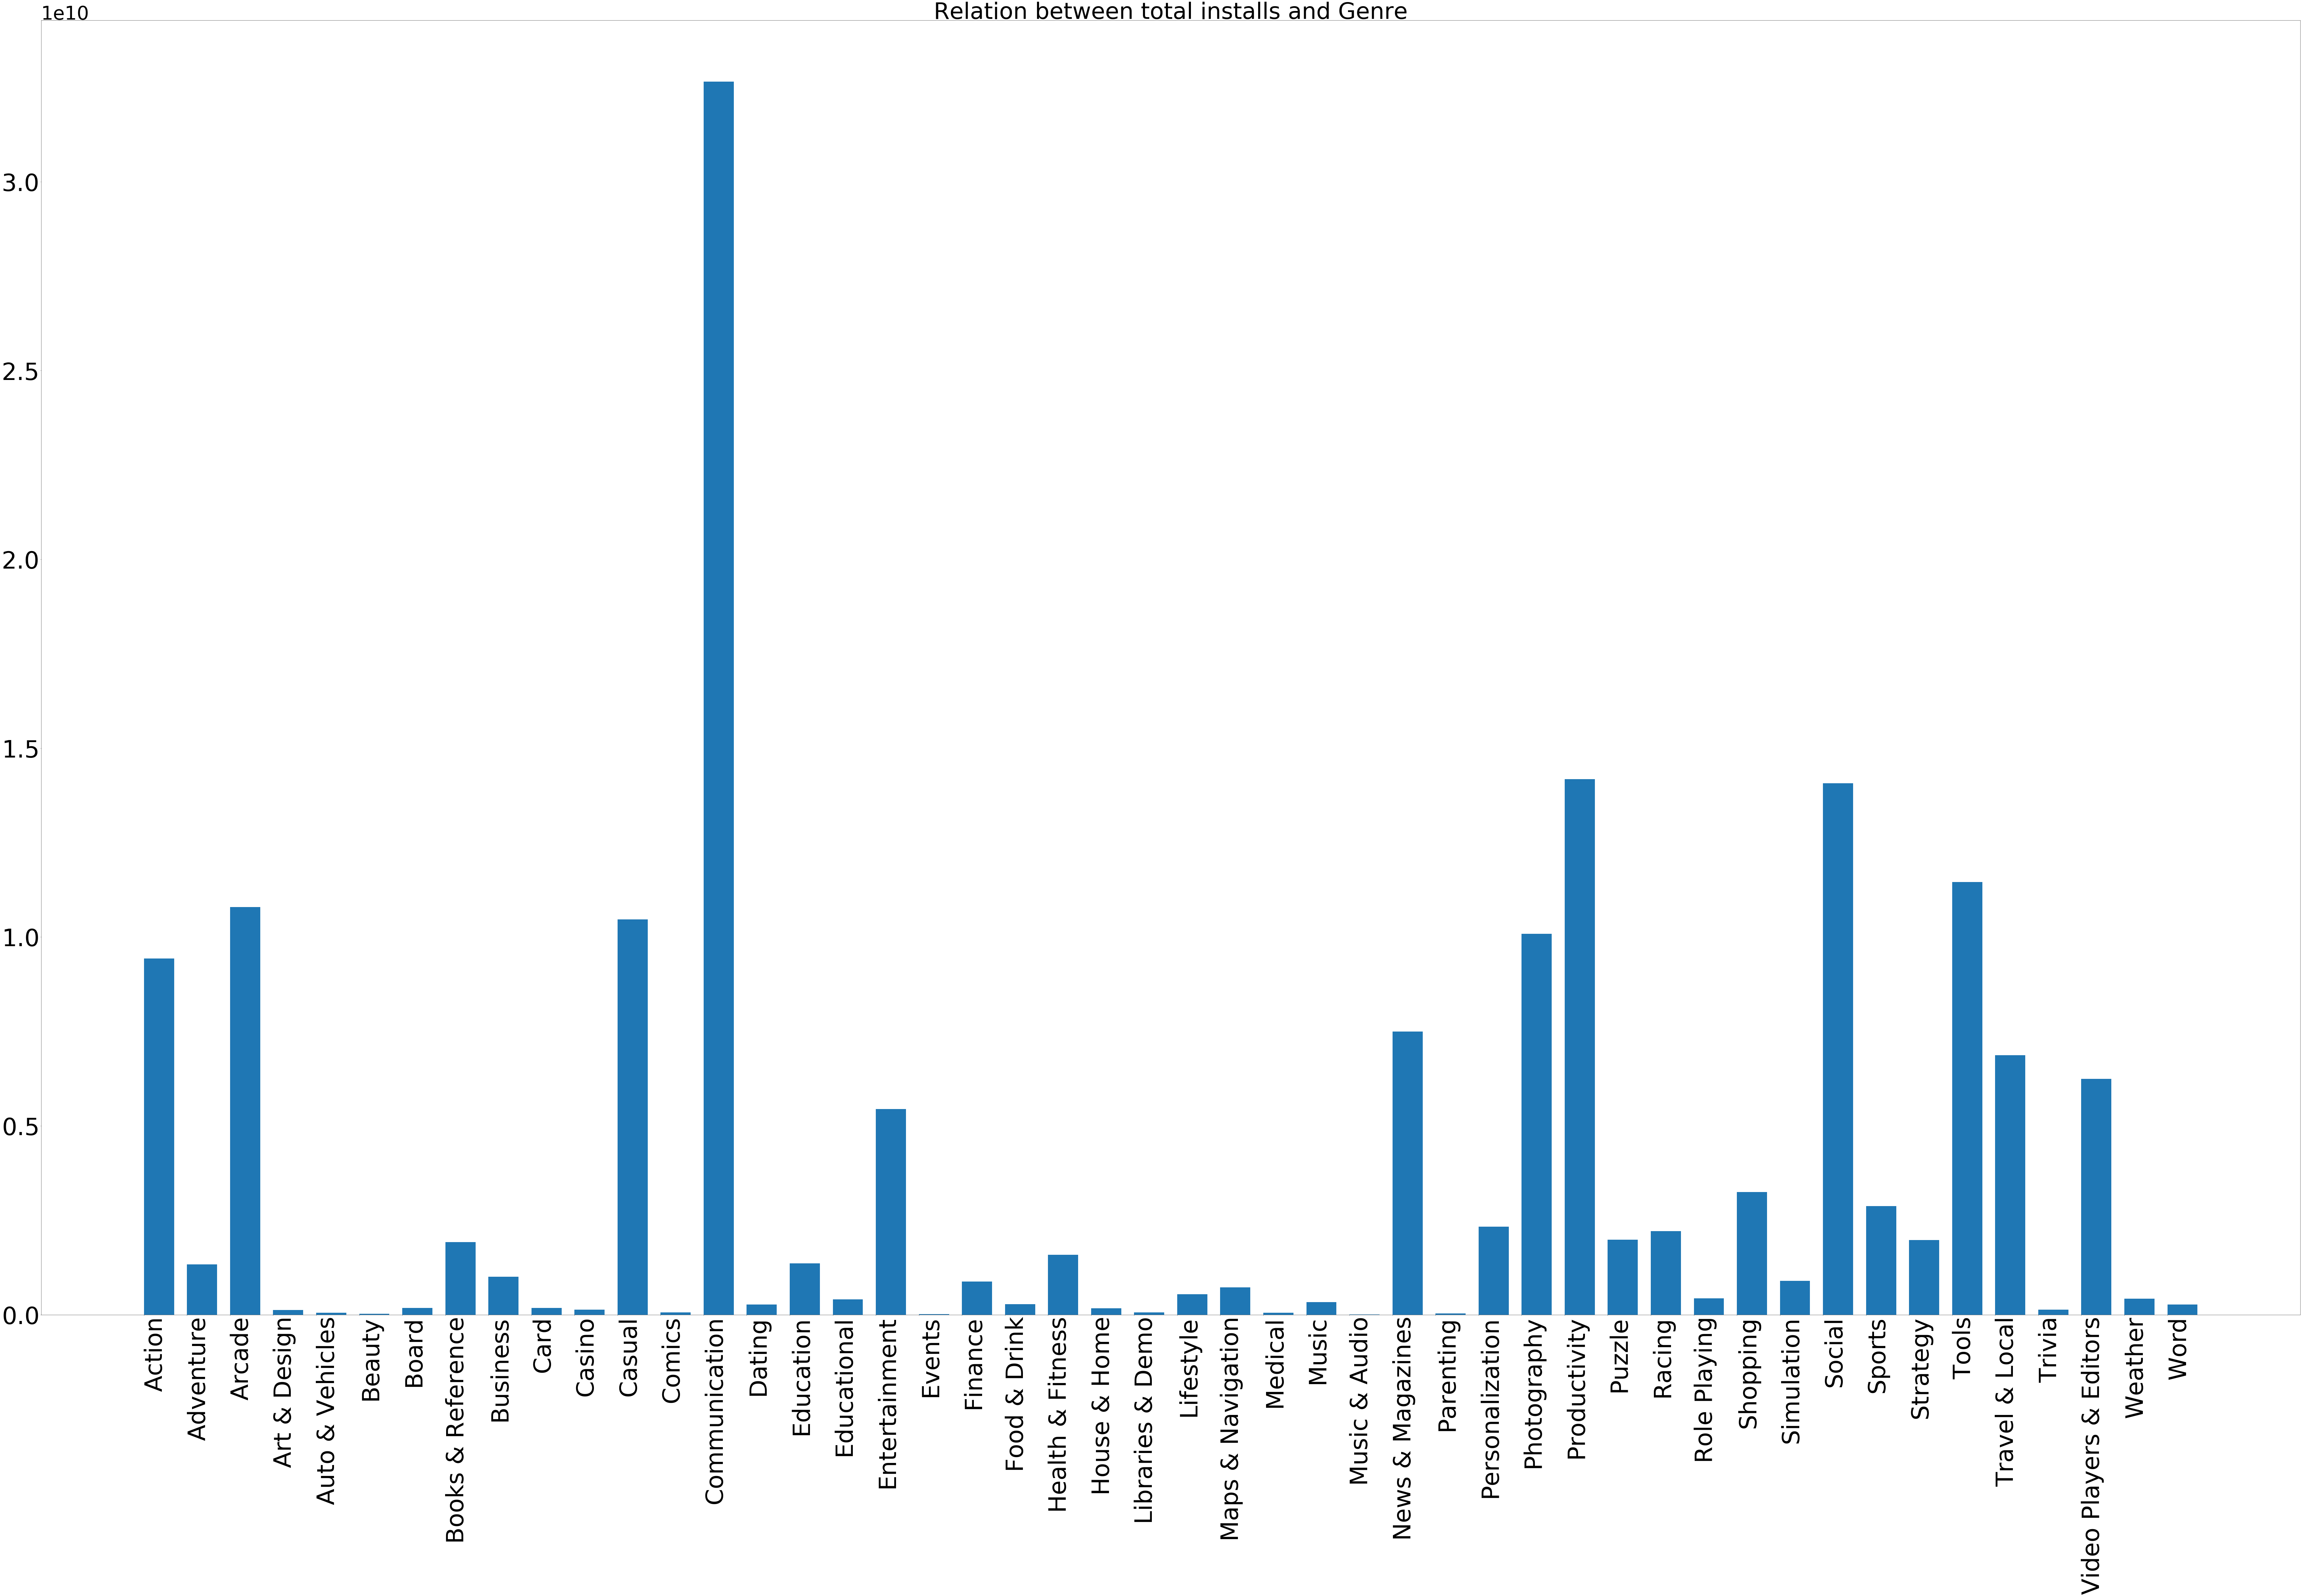

In [44]:
installsPerGenre = ds.groupby(["Genre1"], as_index=False).agg({'Installs': 'sum'})
fig, axes = plt.subplots(figsize=(170,100), dpi=50)
plt.xticks(ha='left',rotation=90,fontsize=100)
plt.yticks(fontsize=100)

plt.rcParams.update({'font.size':80})
normedInstallsPerGenre = installsPerGenre['Installs']
plt.bar(installsPerGenre['Genre1'], normedInstallsPerGenre ,width=0.7, align='edge', )
plt.title('Relation between total installs and Genre');

### 2.8 Target Audience Analysis:
### 2.8.1 What is the number of apps in each category?

**First of all, we checked to see what is the category with the highest number of available apps on Google store. The largest number of apps per category is found in *Weather* followed by the *Game* category. While the lowest number of apps available is found in the *Beauty* **


**Moreover, the high number of available Games could contribute to previous visualizations concering highest number of reviews and installs per category.**

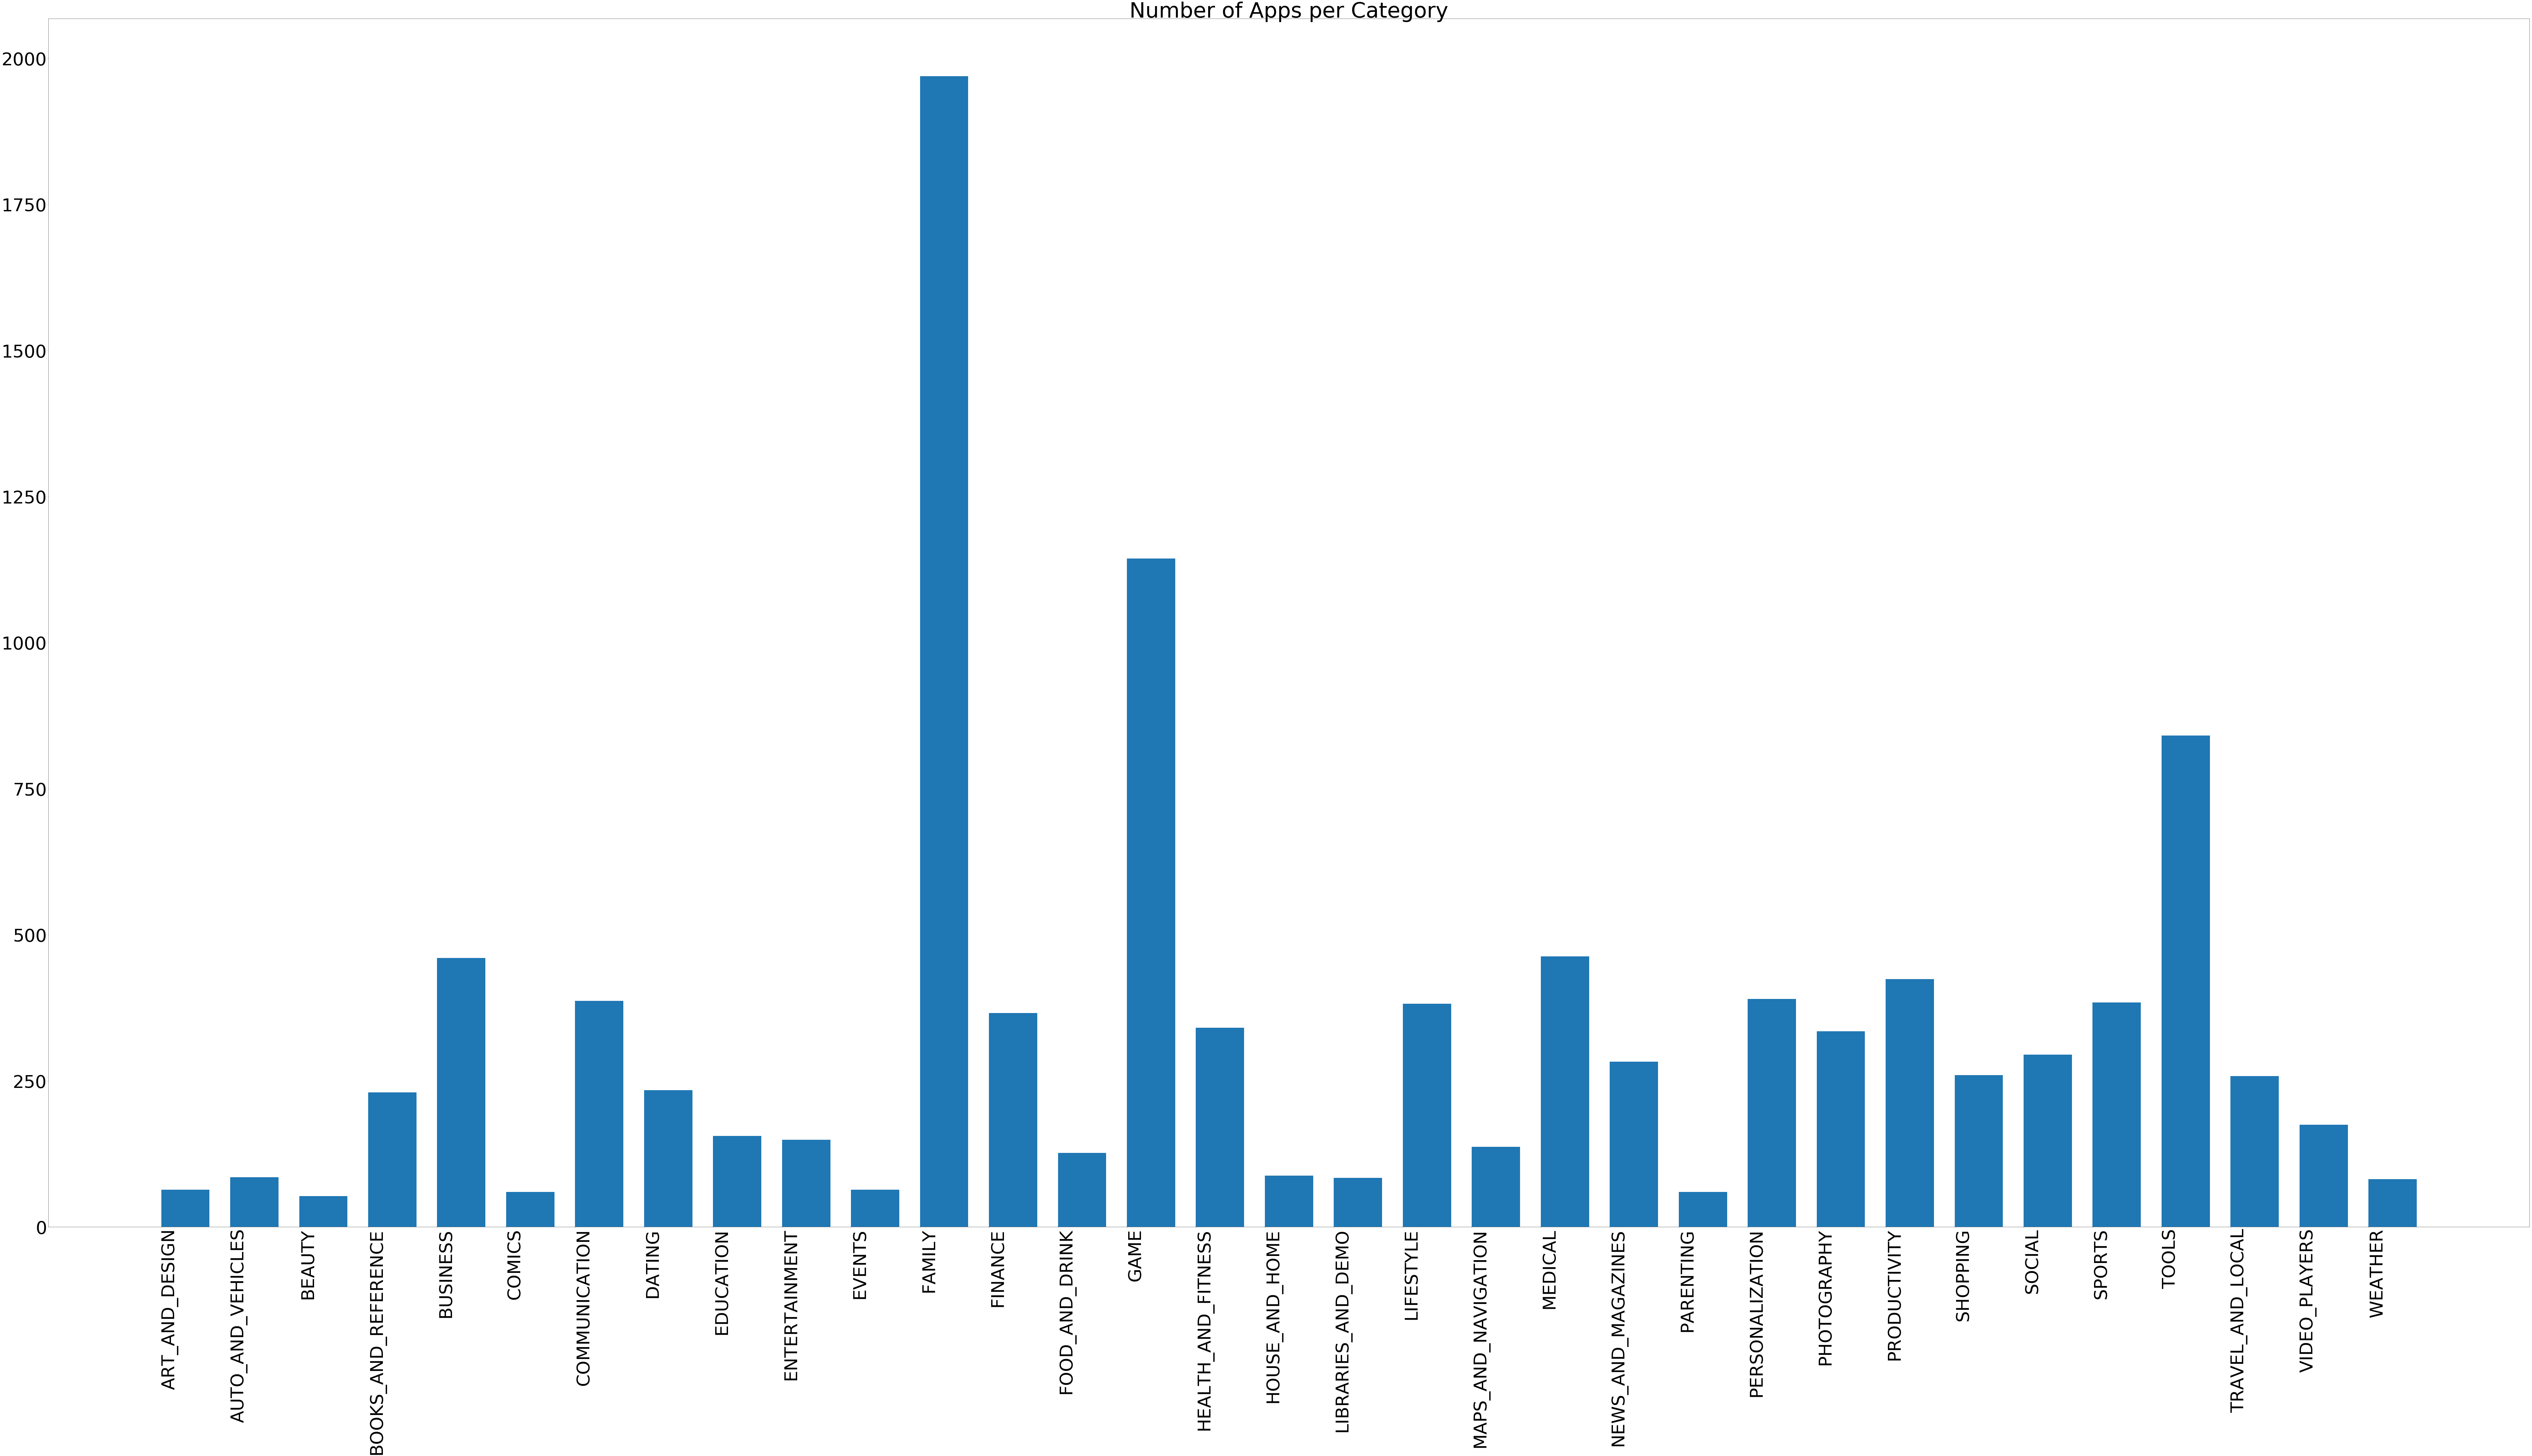

In [45]:

#Target Audience: Some info about the users of the applications

#number of apps in each category:
appsPerCat = ds.groupby(["Category"], as_index=False).agg({'App':'count'})
max = appsPerCat['App'].max()



fig, axes = plt.subplots(figsize=(200,100), dpi=50)
plt.xticks(ha='left',rotation=90,fontsize=80)
plt.rcParams.update({'font.size':80})
plt.bar(appsPerCat['Category'] ,appsPerCat['App'],width=0.7, align='edge',clip_on = False )
plt.title('Number of Apps per Category');


### 2.8.2 What is the Content rating of the games available on the app store?

**Since the *Game* category is one of the best performing categories, we drilled down on the category to understand it more and gain more insights about it. Therefore, we took a look at the content ratings of the games.**

**As shown in the pie chart, the games rated for Everyone are the most common content rating for games. This could make the games more accessible to a larger and wider audience of users thus helping in the better performance of the category compared with the rest.**

([<matplotlib.patches.Wedge at 0x1a792170518>,
 [Text(-0.10857,1.09463,'Everyone'),
  Text(-0.933457,-0.581943,'Everyone 10+'),
  Text(-0.478827,-0.990316,'Mature 17+'),
  Text(0.67601,-0.867762,'Teen')])

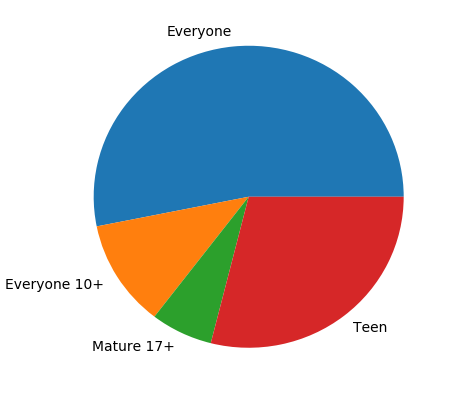

In [46]:
gamesArray = ds[ds['Category'] == 'GAME']
contentPerGame = gamesArray.groupby(["Content Rating"], as_index=False).agg({'App':'count'})
df = pd.DataFrame(contentPerGame)

plt.rcParams.update({'font.size':20})
fig, axes = plt.subplots(figsize=(10,10), dpi=50)
labels = 'Everyone','Everyone 10+','Mature 17+','Teen'
plt.pie(df['App'],labels = labels)

### 2.8.3 What is the relationship between the Genre and the number of installs?

**The next step was to find out which genre of apps were better performing compared to others. to do this, we created a contengency matrix to find the relationship between Genre and the installs. Afterwards, we calculated the chi2 value to check the statistical significance of the p-value to find if there is true correlation between the two columns. the resulting calculation shows that there IS a statistically significant relationship between the two columns as the p-value is less that 0.05. Moreover, the heatmap shows the different number of installs with the genre.**

(240.7669129194424,
 1.4379357348900645e-28,
 45,
 array([[149.9020979 , 107.11888112,  69.48251748,  41.4965035 ],
        [ 32.58741259,  23.28671329,  15.1048951 ,   9.02097902],
        [ 89.61538462,  64.03846154,  41.53846154,  24.80769231],
        [ 17.92307692,  12.80769231,   8.30769231,   4.96153846],
        [ 19.55244755,  13.97202797,   9.06293706,   5.41258741],
        [ 15.88636364,  11.35227273,   7.36363636,   4.39772727],
        [ 19.95979021,  14.26311189,   9.25174825,   5.52534965],
        [  8.96153846,   6.40384615,   4.15384615,   2.48076923],
        [ 17.10839161,  12.22552448,   7.93006993,   4.73601399],
        [ 39.91958042,  28.52622378,  18.5034965 ,  11.0506993 ],
        [  6.51748252,   4.65734266,   3.02097902,   1.8041958 ],
        [  5.29545455,   3.78409091,   2.45454545,   1.46590909],
        [  5.7027972 ,   4.07517483,   2.64335664,   1.57867133],
        [  9.77622378,   6.98601399,   4.53146853,   2.70629371],
        [ 15.47902098,  11

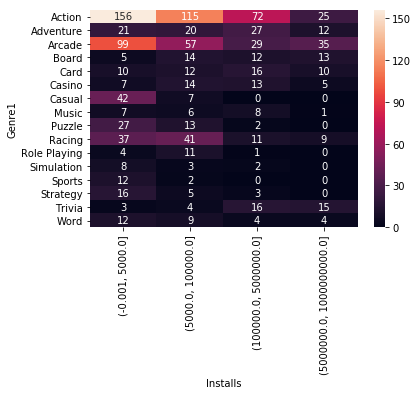

In [47]:
#contingency
installs2 = pd.qcut(ds["Installs"],q = 4)
contengency_table = pd.crosstab(gamesArray['Genre1'],installs2)
contengency_table

plt.rcParams.update({'font.size':10})

hm = sb.heatmap(contengency_table,annot = True, fmt = "d")

st.chi2_contingency(contengency_table)


#based on this info of the chi2, it can be concluded that there is a statistically significant relationship between 
#the Genre of the game and the number of installs